In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

%matplotlib inline

## Data Exploration

- Extract dataset
- Understand the data distribution to see if the dataset is skewed



In [131]:
data_file_path = os.path.join("data","Master List of Preferred Term v21 2020_03_19 (1).xlsx")
excel_file_obj = pd.ExcelFile(data_file_path)
df = excel_file_obj.parse("Compiled")

In [132]:
print(f"No of rows, columns: {df.shape}")

No of rows, columns: (1168, 3)


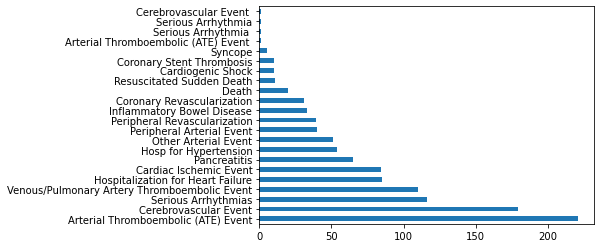

In [139]:
df.loc[:,'Endpoint'].value_counts().plot(kind="barh")



In [140]:
## Split dataset, train, test 
split_percent = 0.05
seed = 10

# bag of words model -count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer()
data = df.loc[:,'MedDRA Preferred Term (PT)']
labels = df.loc[:,'Endpoint']

X = matrix.fit_transform(data).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = split_percent, random_state=seed)

In [141]:
print(f"No of training dataset:{X_train.shape}, No of test set: {X_test.shape}")

No of training dataset:(1109, 665), No of test set: (59, 665)


In [142]:
## Distribution of samples in train and test set

Text(0.5, 1.0, 'Training set distribution')

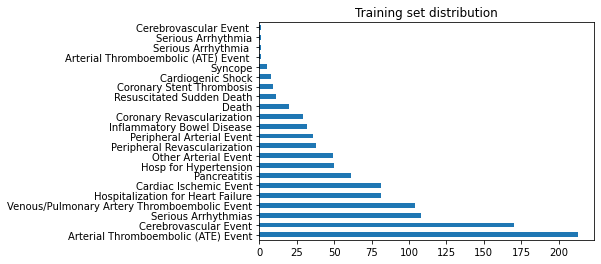

In [143]:
y_train.value_counts().plot(kind="barh")
plt.title("Training set distribution")

Text(0.5, 1.0, 'Test set distribution')

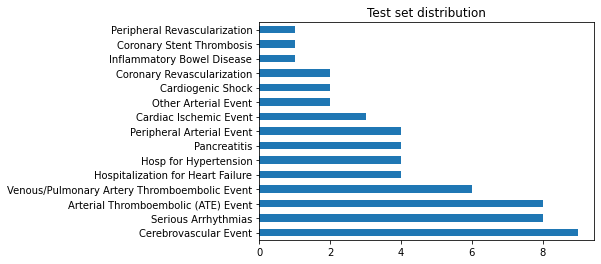

In [144]:
y_test.value_counts().plot(kind="barh")
plt.title("Test set distribution")

In [145]:
print(y_train.value_counts()) 
print("-"*50)
print(y_test.value_counts())

Arterial Thromboembolic (ATE) Event             213
Cerebrovascular Event                           170
Serious Arrhythmias                             108
Venous/Pulmonary Artery Thromboembolic Event    104
Hospitalization for Heart Failure                81
Cardiac Ischemic Event                           81
Pancreatitis                                     61
Hosp for Hypertension                            50
Other Arterial Event                             49
Peripheral Revascularization                     38
Peripheral Arterial Event                        36
Inflammatory Bowel Disease                       32
Coronary Revascularization                       29
Death                                            20
Resuscitated Sudden Death                        11
Coronary Stent Thrombosis                         9
Cardiogenic Shock                                 8
Syncope                                           5
Arterial Thromboembolic (ATE) Event               1
Serious Arrh

In [146]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict class
y_pred = classifier.predict(X_test)

In [147]:
## Accuracy
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)

In [148]:
accuracy_score

0.3389830508474576

In [149]:
## knearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

classifier_knn = KNeighborsClassifier(n_neighbors = 5, weights = "distance", algorithm = "brute")

classifier_knn.fit(X_train, y_train)

# predicting the train data set results
y_pred_knn = classifier_knn.predict(X_test)

In [150]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [151]:
print("kNN accuracy score on train set:{}".format(classifier_knn.score(X_train,y_train)))

kNN accuracy score on train set:0.7655545536519387


In [153]:
print("kNN accuracy score on test set:{}".format(classifier_knn.score(X_test,y_test)))

kNN accuracy score on test set:0.423728813559322


In [154]:
## Decision tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion="gini", max_depth=None, splitter = "best", random_state = 55)

classifier_dt.fit(X_train, y_train)

# predicting the train data set results
y_pred_dt = classifier_dt.predict(X_test)

# confusion matrix
cm_dm = confusion_matrix(y_test, y_pred_dt)
cm_dm

array([[2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [6, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 5, 0],
       [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [156]:
print("decision tree accuracy score on train set:{}".format(classifier_dt.score(X_train,y_train)))

decision tree accuracy score on train set:0.7655545536519387


In [157]:
print("decision tree accuracy score on test set:{}".format(classifier_dt.score(X_test,y_test)))

decision tree accuracy score on test set:0.4067796610169492


In [158]:
## Logistic Regression Model

In [159]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

# predicting the train data set results
y_pred_lr = classifier_lr.predict(X_test)

# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [160]:
print("logistic regression accuracy score on train set:{}".format(classifier_lr.score(X_train,y_train)))
print("logistic regression accuracy score on test set:{}".format(classifier_lr.score(X_test,y_test)))

logistic regression accuracy score on train set:0.7285843101893598
logistic regression accuracy score on test set:0.4745762711864407


In [161]:
## XGBoost
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(max_depth = 6, learning_rate = 0.3, n_estimators = 1500)
classifier_xgb.fit(X_train, y_train)

# predicting the train data set results
y_pred_xgb = classifier_xgb.predict(X_test)

# confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

In [162]:
print("XGBoost  accuracy score on train set:{}".format(classifier_xgb.score(X_train,y_train)))
print("XGBoost  accuracy score on test set:{}".format(classifier_xgb.score(X_test,y_test)))

XGBoost  accuracy score on train set:0.6402164111812444
XGBoost  accuracy score on test set:0.4745762711864407


In [163]:
## Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB()
classifier_mnb.fit(X_train, y_train)

# predicting the train data set results
y_pred_mnb = classifier_mnb.predict(X_test)

# confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)


In [164]:
print("MultinomialNB  accuracy score on train set:{}".format(classifier_mnb.score(X_train,y_train)))
print("MultinomialNB  accuracy score on test set:{}".format(classifier_mnb.score(X_test,y_test)))

MultinomialNB  accuracy score on train set:0.6672678088367899
MultinomialNB  accuracy score on test set:0.5084745762711864


In [165]:
## Voting Classifier - ensemble classifier
from sklearn.ensemble import VotingClassifier

models = [('LogisticRegression', classifier_lr), ('XGBoost Classifier', classifier_xgb), ('DecisionTree Classifier', classifier_dt),('K-Nearest Neighbor',classifier_knn),('Guassian Naive Bayes',classifier),('MultinomialNB',classifier_mnb)]

classifier_vc = VotingClassifier(voting='hard', estimators=models)

classifier_vc.fit(X_train, y_train)

# predicting the train data set results
y_pred_vc = classifier_vc.predict(X_test)

# confusion matrix
cm_vc = confusion_matrix(y_test, y_pred_vc)


In [166]:
print("Voting classifier  accuracy score on train set:{}".format(classifier_vc.score(X_train,y_train)))
print("Voting classifier  accuracy score on test set:{}".format(classifier_vc.score(X_test,y_test)))

Voting classifier  accuracy score on train set:0.7592425608656447
Voting classifier  accuracy score on test set:0.4576271186440678
